# Predicting the Sale Price of Bulldozer using Machine Learning

### 1. Problem Definition

How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

### 2. Data

Kaggle dataset - https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

1. **Traiin.csv** - Historical bulldozer sales examples up to 2011
2. **Valid.csv** - Historical bulldozer sales examples from January 1 2012
3. **Test.csv** - Historical bulldozer sales examples from May 1 2012 to Nov 2012

### 3. Evaluation

Root Mean Squared Log Error (RMSLE)

### 4. Importing the data and preparing it for modelling

In [1]:
# Import data analysis tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import training and validation set

path = '/content/TrainAndValid.csv'
df = pd.read_csv(path, error_bad_lines=False)
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246      66000     999089     3157         121             3      2004   
1  1139248      57000     117657       77         121             3      1996   
2  1139249      10000     434808     7009         121             3      2001   
3  1139251      38500    1026470      332         121             3      2001   
4  1139253      11000    1057373    17311         121             3      2007   

   MachineHoursCurrentMeter UsageBand         saledate  ...  \
0                      68.0       Low  11/16/2006 0:00  ...   
1                    4640.0       Low   3/26/2004 0:00  ...   
2                    2838.0      High   2/26/2004 0:00  ...   
3                    3486.0      High   5/19/2011 0:00  ...   
4                     722.0    Medium   7/23/2009 0:00  ...   

  Undercarriage_Pad_Width Stick_Length Thumb Pattern_Changer Grouser_Type  \
0                     NaN          NaN   NaN             NaN          NaN   
1                     NaN          NaN   NaN             NaN          NaN   
2                     NaN          NaN   NaN             NaN          NaN   
3                     NaN          NaN   NaN             NaN          NaN   
4                     NaN          NaN   NaN             NaN          NaN   

  Backhoe_Mounting Blade_Type Travel_Controls Differential_Type  \
0              NaN        NaN             NaN          Standard   
1              NaN        NaN             NaN          Standard   
2              NaN        NaN             NaN               NaN   
3              NaN        NaN             NaN               NaN   
4              NaN        NaN             NaN               NaN   

  Steering_Controls  
0      Conventional  
1      Conventional  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 53 columns]

In [3]:
df.shape

(192500, 53)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192500 entries, 0 to 192499
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   192500 non-null  int64  
 1   SalePrice                 192500 non-null  int64  
 2   MachineID                 192500 non-null  int64  
 3   ModelID                   192500 non-null  int64  
 4   datasource                192500 non-null  int64  
 5   auctioneerID              192500 non-null  int64  
 6   YearMade                  192500 non-null  int64  
 7   MachineHoursCurrentMeter  30114 non-null   float64
 8   UsageBand                 27188 non-null   object 
 9   saledate                  192500 non-null  object 
 10  fiModelDesc               192500 non-null  object 
 11  fiBaseModel               192500 non-null  object 
 12  fiSecondaryDesc           139571 non-null  object 
 13  fiModelSeries             13807 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter    162386
UsageBand                   165312
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc              52929
fiModelSeries               178693
fiModelDescriptor           160561
ProductSize                 102346
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                134913
Enclosure                       65
Forks                        99864
Pad_Type                    150518
Ride_Control                112467
Stick                       150518
Transmission                 91234
Turbocharged                150518
Blade_Extension     

In [6]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

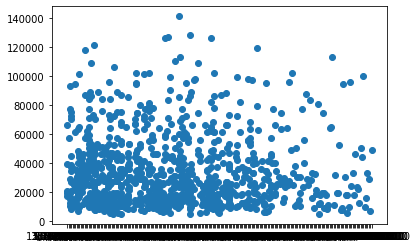

In [7]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [8]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [9]:
df.saledate.dtype

dtype('O')

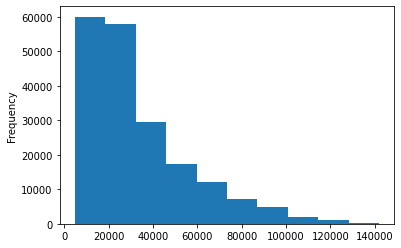

In [10]:
df.SalePrice.plot.hist()

### Parsing dates

In [11]:
# Importing data again but this time parse date

df = pd.read_csv(path, low_memory=False, parse_dates=['saledate'])

In [12]:
df.saledate.dtype

dtype('<M8[ns]')

In [13]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

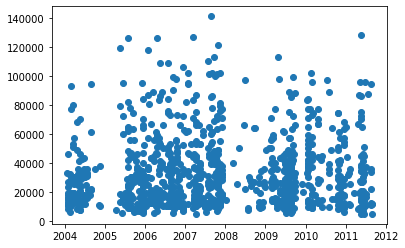

In [14]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [15]:
df.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246      66000     999089     3157         121             3      2004   
1  1139248      57000     117657       77         121             3      1996   
2  1139249      10000     434808     7009         121             3      2001   
3  1139251      38500    1026470      332         121             3      2001   
4  1139253      11000    1057373    17311         121             3      2007   

   MachineHoursCurrentMeter UsageBand   saledate  ... Undercarriage_Pad_Width  \
0                      68.0       Low 2006-11-16  ...                     NaN   
1                    4640.0       Low 2004-03-26  ...                     NaN   
2                    2838.0      High 2004-02-26  ...                     NaN   
3                    3486.0      High 2011-05-19  ...                     NaN   
4                     722.0    Medium 2009-07-23  ...                     NaN   

  Stick_Length Thumb Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0          NaN   NaN             NaN          NaN              NaN        NaN   
1          NaN   NaN             NaN          NaN              NaN        NaN   
2          NaN   NaN             NaN          NaN              NaN        NaN   
3          NaN   NaN             NaN          NaN              NaN        NaN   
4          NaN   NaN             NaN          NaN              NaN        NaN   

  Travel_Controls Differential_Type Steering_Controls  
0             NaN          Standard      Conventional  
1             NaN          Standard      Conventional  
2             NaN               NaN               NaN  
3             NaN               NaN               NaN  
4             NaN               NaN               NaN  

[5 rows x 53 columns]

In [16]:
df.head().T

0  \
SalesID                                                    1139246   
SalePrice                                                    66000   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                     3   
YearMade                                                      2004   
MachineHoursCurrentMeter                                      68.0   
UsageBand                                                      Low   
saledate                                       2006-11-16 00:00:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                                 1  \
SalesID                                                    1139248   
SalePrice                                                    57000   
MachineID                                                   117657   
Mode

In [17]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

In [18]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate.head()

55454    1989-01-31
142669   1989-01-31
114830   1989-01-31
78278    1989-01-31
92256    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe

In [19]:
df_tmp = df.copy()

### Add datatime parameters for the saledate column

In [20]:
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDatOfYear'] = df_tmp['saledate'].dt.dayofyear

In [21]:
df_tmp.head().T

55454   \
SalesID                                                  1305336   
SalePrice                                                  17000   
MachineID                                                1236263   
ModelID                                                     3356   
datasource                                                   132   
auctioneerID                                                  99   
YearMade                                                    1972   
MachineHoursCurrentMeter                                     NaN   
UsageBand                                                    NaN   
saledate                                     1989-01-31 00:00:00   
fiModelDesc                                                  12F   
fiBaseModel                                                   12   
fiSecondaryDesc                                                F   
fiModelSeries                                                NaN   
fiModelDescriptor                                            NaN   
ProductSize                                                  NaN   
fiProductClassDesc        Motorgrader - 45.0 to 130.0 Horsepower   
state                                                    Florida   
ProductGroup                                                  MG   
ProductGroupDesc                                   Motor Graders   
Drive_System                                                  No   
Enclosure                                                  OROPS   
Forks                                                        NaN   
Pad_Type                                                     NaN   
Ride_Control                                                 NaN   
Stick                                                        NaN   
Transmission                                 None or Unspecified   
Turbocharged                                                 NaN   
Blade_Extension                              None or Unspecified   
Blade_Width                                  None or Unspecified   
Enclosure_Type                               None or Unspecified   
Engine_Horsepower                                             No   
Hydraulics                                     Base + 1 Function   
Pushblock                                    None or Unspecified   
Ripper                                       None or Unspecified   
Scarifier                                                    Yes   
Tip_Control                                  None or Unspecified   
Tire_Size                                                    14"   
Coupler                                                      NaN   
Coupler_System                                               NaN   
Grouser_Tracks                                               NaN   
Hydraulics_Flow                                              NaN   
Track_Type                                                   NaN   
Undercarriage_Pad_Width                                      NaN   
Stick_Length                                                 NaN   
Thumb                                                        NaN   
Pattern_Changer                                              NaN   
Grouser_Type                                                 NaN   
Backhoe_Mounting                                             NaN   
Blade_Type                                                   NaN   
Travel_Controls                                              NaN   
Differential_Type                                            NaN   
Steering_Controls                                            NaN   
saleYear                                                    1989   
saleMonth                                                      1   
saleDay                                                       31   
saleDayOfWeek                                                  1   
saleDatOfYear                                                 31   

                                             

In [22]:
# remove saledate

df_tmp.drop(columns=['saledate'], inplace=True, axis=1)

In [23]:
df_tmp.state.value_counts()

Florida           29314
Texas             24054
California        12399
Washington         6915
Mississippi        6810
Georgia            6369
Pennsylvania       6131
Ohio               5940
Illinois           5643
New Jersey         5573
Alabama            5323
Maryland           5306
Colorado           5274
Tennessee          4836
North Carolina     4793
South Carolina     4433
New York           4422
Arizona            4065
Louisiana          3703
Minnesota          3555
Connecticut        3350
Kentucky           3250
Missouri           3062
Maine              3016
Nevada             2857
Indiana            2429
Unspecified        2165
New Mexico         1889
Arkansas           1719
New Hampshire      1535
Wisconsin          1359
Utah               1285
Wyoming            1149
Virginia           1140
Oregon             1071
Idaho              1043
Oklahoma            721
Montana             659
Iowa                642
West Virginia       544
Kansas              539
Michigan        

In [24]:
df_tmp.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
55454   1305336      17000    1236263     3356         132            99   
142669  1508793      28000    1255973     4138         132            99   
114830  1451684      23000    1434619     3854         132            99   
78278   1370389      28000    1194311     4146         132            99   
92256   1403368      21500    1165291     7110         132            99   

        YearMade  MachineHoursCurrentMeter UsageBand fiModelDesc  ...  \
55454       1972                       NaN       NaN         12F  ...   
142669      1973                       NaN       NaN         D7F  ...   
114830      1969                       NaN       NaN        966C  ...   
78278       1974                       NaN       NaN         D8H  ...   
92256       1985                       NaN       NaN         416  ...   

           Backhoe_Mounting           Blade_Type      Travel_Controls  \
55454                   NaN                  NaN                  NaN   
142669  None or Unspecified  None or Unspecified  None or Unspecified   
114830                  NaN                  NaN                  NaN   
78278   None or Unspecified             Straight  None or Unspecified   
92256                   NaN                  NaN                  NaN   

       Differential_Type Steering_Controls saleYear saleMonth saleDay  \
55454                NaN               NaN     1989         1      31   
142669               NaN               NaN     1989         1      31   
114830          Standard      Conventional     1989         1      31   
78278                NaN               NaN     1989         1      31   
92256                NaN               NaN     1989         1      31   

       saleDayOfWeek saleDatOfYear  
55454              1            31  
142669             1            31  
114830             1            31  
78278              1            31  
92256              1            31  

[5 rows x 57 columns]

In [25]:
len(df_tmp)

192500

### 5. Modelling

Some model driven EDA

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
#model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

In [27]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192500 entries, 55454 to 23968
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   192500 non-null  int64  
 1   SalePrice                 192500 non-null  int64  
 2   MachineID                 192500 non-null  int64  
 3   ModelID                   192500 non-null  int64  
 4   datasource                192500 non-null  int64  
 5   auctioneerID              192500 non-null  int64  
 6   YearMade                  192500 non-null  int64  
 7   MachineHoursCurrentMeter  30114 non-null   float64
 8   UsageBand                 27188 non-null   object 
 9   fiModelDesc               192500 non-null  object 
 10  fiBaseModel               192500 non-null  object 
 11  fiSecondaryDesc           139571 non-null  object 
 12  fiModelSeries             13807 non-null   object 
 13  fiModelDescriptor         31939 non-null 

In [28]:
df_tmp['UsageBand'].dtype

dtype('O')

In [29]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter    162386
UsageBand                   165312
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc              52929
fiModelSeries               178693
fiModelDescriptor           160561
ProductSize                 102346
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                134913
Enclosure                       65
Forks                        99864
Pad_Type                    150518
Ride_Control                112467
Stick                       150518
Transmission                 91234
Turbocharged                150518
Blade_Extension             176901
Blade_Width         

### Convert string to categories

In [30]:
df_tmp.head().T

55454   \
SalesID                                                  1305336   
SalePrice                                                  17000   
MachineID                                                1236263   
ModelID                                                     3356   
datasource                                                   132   
auctioneerID                                                  99   
YearMade                                                    1972   
MachineHoursCurrentMeter                                     NaN   
UsageBand                                                    NaN   
fiModelDesc                                                  12F   
fiBaseModel                                                   12   
fiSecondaryDesc                                                F   
fiModelSeries                                                NaN   
fiModelDescriptor                                            NaN   
ProductSize                                                  NaN   
fiProductClassDesc        Motorgrader - 45.0 to 130.0 Horsepower   
state                                                    Florida   
ProductGroup                                                  MG   
ProductGroupDesc                                   Motor Graders   
Drive_System                                                  No   
Enclosure                                                  OROPS   
Forks                                                        NaN   
Pad_Type                                                     NaN   
Ride_Control                                                 NaN   
Stick                                                        NaN   
Transmission                                 None or Unspecified   
Turbocharged                                                 NaN   
Blade_Extension                              None or Unspecified   
Blade_Width                                  None or Unspecified   
Enclosure_Type                               None or Unspecified   
Engine_Horsepower                                             No   
Hydraulics                                     Base + 1 Function   
Pushblock                                    None or Unspecified   
Ripper                                       None or Unspecified   
Scarifier                                                    Yes   
Tip_Control                                  None or Unspecified   
Tire_Size                                                    14"   
Coupler                                                      NaN   
Coupler_System                                               NaN   
Grouser_Tracks                                               NaN   
Hydraulics_Flow                                              NaN   
Track_Type                                                   NaN   
Undercarriage_Pad_Width                                      NaN   
Stick_Length                                                 NaN   
Thumb                                                        NaN   
Pattern_Changer                                              NaN   
Grouser_Type                                                 NaN   
Backhoe_Mounting                                             NaN   
Blade_Type                                                   NaN   
Travel_Controls                                              NaN   
Differential_Type                                            NaN   
Steering_Controls                                            NaN   
saleYear                                                    1989   
saleMonth                                                      1   
saleDay                                                       31   
saleDayOfWeek                                                  1   
saleDatOfYear                                                 31   

                                                                     142669  \
SalesID                           

In [31]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

True

In [32]:
# Find columns which contain strings

for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [33]:
# Turn string values into category values

for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()


In [34]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192500 entries, 55454 to 23968
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   192500 non-null  int64   
 1   SalePrice                 192500 non-null  int64   
 2   MachineID                 192500 non-null  int64   
 3   ModelID                   192500 non-null  int64   
 4   datasource                192500 non-null  int64   
 5   auctioneerID              192500 non-null  int64   
 6   YearMade                  192500 non-null  int64   
 7   MachineHoursCurrentMeter  30114 non-null   float64 
 8   UsageBand                 27188 non-null   category
 9   fiModelDesc               192500 non-null  category
 10  fiBaseModel               192500 non-null  category
 11  fiSecondaryDesc           139571 non-null  category
 12  fiModelSeries             13807 non-null   category
 13  fiModelDescriptor         

In [35]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [36]:
df_tmp.state.cat.codes

55454      8
142669     8
114830     8
78278      8
92256      8
          ..
23967     10
23970      4
23971     43
23972     43
23968      4
Length: 192500, dtype: int8

In [37]:
# Check missing data %

df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.000000
YearMade                    0.000000
MachineHoursCurrentMeter    0.843564
UsageBand                   0.858764
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.274956
fiModelSeries               0.928275
fiModelDescriptor           0.834083
ProductSize                 0.531668
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.700847
Enclosure                   0.000338
Forks                       0.518774
Pad_Type                    0.781912
Ride_Control                0.584244
Stick                       0.781912
Transmission                0.473943
Turbocharged                0.781912
B

### Save processed data

In [38]:
# df_tmp.to_csv('train.csv', index=False)

### Fill missing values

In [39]:
# Fill numerical missing values first

for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDatOfYear


In [40]:
# check for which numerical columns have null values

for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

MachineHoursCurrentMeter


In [42]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column that tells us if the data was missing
      df_tmp[label+'is_missing'] = pd.isnull(content)
      # Replace null with meadian
      df_tmp[label] = content.fillna(content.median())

In [43]:
df_tmp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             165312
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                        52929
fiModelSeries                         178693
fiModelDescriptor                     160561
ProductSize                           102346
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          134913
Enclosure                                 65
Forks                                  99864
Pad_Type  

In [44]:
# Filling and turning categorical values into numbers

for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [61]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_tmp[label] = le.fit_transform(df_tmp[label])

In [62]:
df_tmp.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
55454   1305336      17000    1236263     3356         132            99   
142669  1508793      28000    1255973     4138         132            99   
114830  1451684      23000    1434619     3854         132            99   
78278   1370389      28000    1194311     4146         132            99   
92256   1403368      21500    1165291     7110         132            99   

        YearMade  MachineHoursCurrentMeter  UsageBand  fiModelDesc  ...  \
55454       1972                    2637.5          0           53  ...   
142669      1973                    2637.5          0         1509  ...   
114830      1969                    2637.5          0         1175  ...   
78278       1974                    2637.5          0         1534  ...   
92256       1985                    2637.5          0          512  ...   

        Undercarriage_Pad_Widthis_missing  Stick_Lengthis_missing  \
55454                                True                    True   
142669                               True                    True   
114830                               True                    True   
78278                                True                    True   
92256                                True                    True   

        Thumbis_missing  Pattern_Changeris_missing  Grouser_Typeis_missing  \
55454              True                       True                    True   
142669             True                       True                    True   
114830             True                       True                    True   
78278              True                       True                    True   
92256              True                       True                    True   

        Backhoe_Mountingis_missing  Blade_Typeis_missing  \
55454                         True                  True   
142669                       False                 False   
114830                        True                  True   
78278                        False                 False   
92256                         True                  True   

        Travel_Controlsis_missing  Differential_Typeis_missing  \
55454                        True                         True   
142669                      False                         True   
114830                       True                        False   
78278                       False                         True   
92256                        True                         True   

        Steering_Controlsis_missing  
55454                          True  
142669                         True  
114830                        False  
78278                          True  
92256                          True  

[5 rows x 96 columns]

### Instantiating RandomForest model

In [63]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [64]:
# Score the model

model.score(df_tmp.drop('SalePrice', axis=1), df_tmp['SalePrice'])

0.987902747035798

### Splitting data into train/validation sets

In [66]:
df_tmp.saleYear

55454     1989
142669    1989
114830    1989
78278     1989
92256     1989
          ... 
23967     2011
23970     2011
23971     2011
23972     2011
23968     2011
Name: saleYear, Length: 192500, dtype: int64

In [67]:
df_tmp.saleYear.value_counts()

2006    13829
2005    13246
2004    12941
2001    12202
2002    11593
2000    11409
2009     9920
2003     9908
1998     9056
2010     8625
1999     8619
2007     8352
2011     8156
2008     7149
1997     7084
1996     6473
1995     6272
1994     6001
1993     5027
1992     4574
1991     4293
1989     4003
1990     3768
Name: saleYear, dtype: int64

In [70]:
df_val = df_tmp[df_tmp['saleYear'] == 2011]
df_train = df_tmp[df_tmp['saleYear'] != 2012]

In [71]:
len(df_val), len(df_train)

(8156, 192500)

In [72]:
X_train, y_train = df_train.drop('saleYear', axis=1), df_train['saleYear']
X_val, y_val = df_val.drop('saleYear', axis=1), df_val['saleYear']

In [74]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((192500, 95), (192500,), (8156, 95), (8156,))

### Building an evaluation function

In [75]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):

  return np.sqrt(mean_squared_log_error(y_test, y_preds))


def show_scores(model):

  train_preds = model.predict(X_train)
  val_preds = model.predict(X_val)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_val, val_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Valid RMSLE": rmsle(y_val, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_val, val_preds)}

  return scores

### Testing our model on a subset (to tune hyperparameters)